In [1]:
import torch
import numpy
import matplotlib.pyplot as plt

In [2]:
torch.set_default_dtype(torch.float64)
if torch.cuda.is_available():
    torch.set_default_device("cuda")

In [3]:
TEST_DATA_SIZE = 100
X = numpy.sort(numpy.random.rand(TEST_DATA_SIZE, 1), axis=0)
Y = numpy.random.rand(TEST_DATA_SIZE, 1)

In [4]:
input_layer = 1
output_layer = 1
learning_rate = 1e-5

def train(hidden_layer: int, epochs: int, print_debug_info: bool = False) -> None:
    x_tensor = torch.tensor(X)
    y_tensor = torch.tensor(Y)

    model = torch.nn.Sequential(torch.nn.Linear(input_layer, hidden_layer), torch.nn.ReLU(), torch.nn.Linear(hidden_layer, output_layer))
    cost_func = torch.nn.MSELoss(reduction="sum")
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    for i in range(epochs):
        predicted = model(x_tensor)

        loss = cost_func(predicted, y_tensor)

        if print_debug_info:
            iteration_id = i + 1
            if iteration_id % 500 == 0:
                print(f"Info at epoch #{iteration_id}:")
                print(f"Loss: {loss.item()}")

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    final_prediction = numpy.array(model(x_tensor).detach().cpu())

    plt.title(f"Training a 2D regression model with {hidden_layer} neurons within the hidden layer after {epochs} epochs")
    plt.scatter(X, Y)
    plt.plot(X, final_prediction)
    plt.show()

Info at epoch #500:
Loss: 7.385615397017213
Info at epoch #1000:
Loss: 7.375525959145408
Info at epoch #1500:
Loss: 7.374837396105574
Info at epoch #2000:
Loss: 7.374409289505246
Info at epoch #2500:
Loss: 7.3739960828265145
Info at epoch #3000:
Loss: 7.373590962707324
Info at epoch #3500:
Loss: 7.3731935617847135
Info at epoch #4000:
Loss: 7.372803692587618
Info at epoch #4500:
Loss: 7.37242117810426
Info at epoch #5000:
Loss: 7.372045846942493


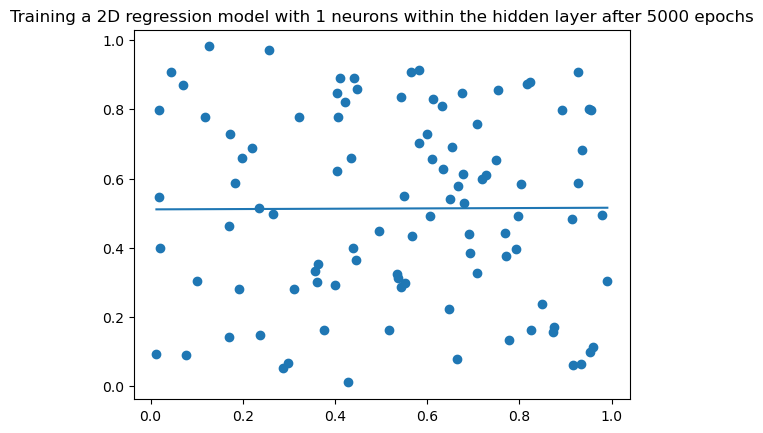

Info at epoch #500:
Loss: 7.4777407428939195
Info at epoch #1000:
Loss: 7.356500658263731
Info at epoch #1500:
Loss: 7.353188189087769
Info at epoch #2000:
Loss: 7.351341552155526
Info at epoch #2500:
Loss: 7.349773753105924
Info at epoch #3000:
Loss: 7.348434126107192
Info at epoch #3500:
Loss: 7.347288852228864
Info at epoch #4000:
Loss: 7.346312853677781
Info at epoch #4500:
Loss: 7.34548635952201
Info at epoch #5000:
Loss: 7.344774127436809


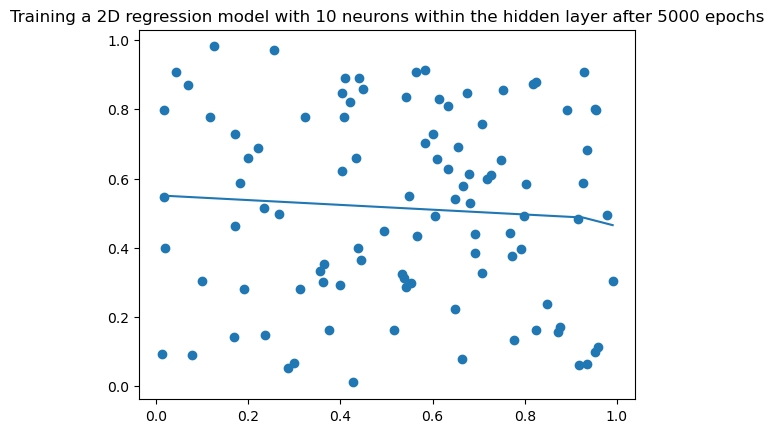

Info at epoch #500:
Loss: 7.783203857339455
Info at epoch #1000:
Loss: 7.4248961547141885
Info at epoch #1500:
Loss: 7.368666048493978
Info at epoch #2000:
Loss: 7.356187968614433
Info at epoch #2500:
Loss: 7.350192980475181
Info at epoch #3000:
Loss: 7.34535932841538
Info at epoch #3500:
Loss: 7.341039844673999
Info at epoch #4000:
Loss: 7.336904271253131
Info at epoch #4500:
Loss: 7.332949374148994
Info at epoch #5000:
Loss: 7.329181077661273


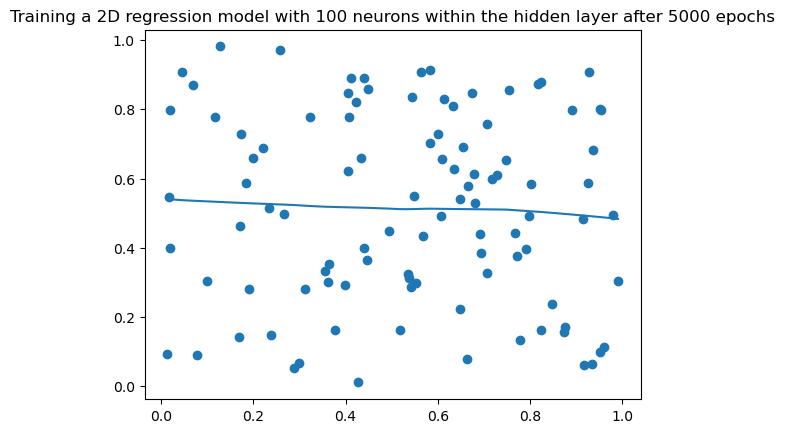

Info at epoch #500:
Loss: 7.355311964107093
Info at epoch #1000:
Loss: 7.323489574303633
Info at epoch #1500:
Loss: 7.301333588362597
Info at epoch #2000:
Loss: 7.285384526712685
Info at epoch #2500:
Loss: 7.273469974219125
Info at epoch #3000:
Loss: 7.264190038802381
Info at epoch #3500:
Loss: 7.256653605844808
Info at epoch #4000:
Loss: 7.250291457326422
Info at epoch #4500:
Loss: 7.244749129747277
Info at epoch #5000:
Loss: 7.239795548124081


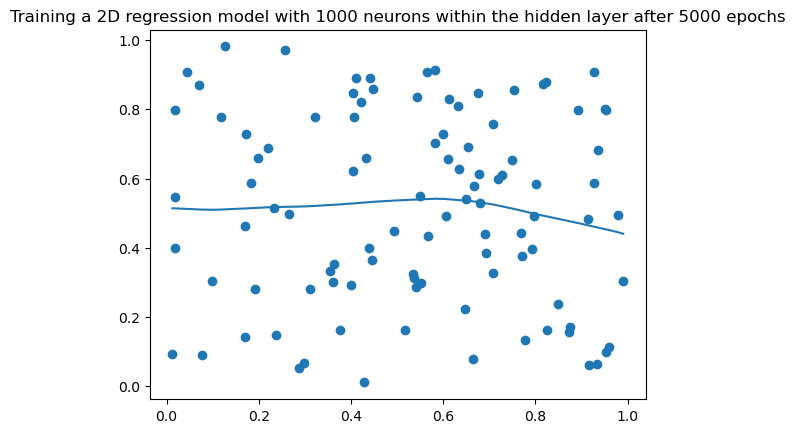

In [5]:
train(1, 5_000, print_debug_info=True)
train(10, 5_000, print_debug_info=True)
train(100, 5_000, print_debug_info=True)
train(1000, 5_000, print_debug_info=True)